### Data and Package Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
trips = pd.read_pickle('../00_data/trips.pkl')
trips_hourly = pd.read_pickle('../00_data/trips_hourly.pkl')
trips_hourly_engineered = pd.read_pickle('../00_data/trips_hourly_engineered.pkl')

In [5]:
trips

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,duration,start_latitude,start_longitude,end_latitude,end_longitude,distance,speed
2,2019-01-01 00:18:00,2019-01-01 00:50:00,3030,3075,05992,Walk-up,Main & 1st,Broadway & 9th,0 days 00:32:00,34.05194,-118.24353,34.04211,-118.25619,1.498844,2.810332
3,2019-01-01 00:20:00,2019-01-01 00:50:00,3030,3075,05860,Walk-up,Main & 1st,Broadway & 9th,0 days 00:30:00,34.05194,-118.24353,34.04211,-118.25619,1.498844,2.997688
4,2019-01-01 00:22:00,2019-01-01 00:50:00,3030,3075,06006,Walk-up,Main & 1st,Broadway & 9th,0 days 00:28:00,34.05194,-118.24353,34.04211,-118.25619,1.498844,3.211808
5,2019-01-01 00:23:00,2019-01-01 00:51:00,3030,3075,06304,Walk-up,Main & 1st,Broadway & 9th,0 days 00:28:00,34.05194,-118.24353,34.04211,-118.25619,1.498844,3.211808
6,2019-01-01 00:24:00,2019-01-01 00:51:00,3030,3075,05846,Walk-up,Main & 1st,Broadway & 9th,0 days 00:27:00,34.05194,-118.24353,34.04211,-118.25619,1.498844,3.330764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290334,2019-12-31 23:33:43,2019-12-31 23:49:47,3018,3047,6707,Monthly Pass,Grand & Olympic,Pico & Flower,0 days 00:16:04,34.04373,-118.26014,34.03998,-118.26640,0.723089,2.700331
290335,2019-12-31 23:33:57,2019-12-31 23:42:19,3063,3069,6484,Walk-up,Pershing Square,Broadway & 3rd,0 days 00:08:22,34.04804,-118.25374,34.05088,-118.24825,0.628099,4.504299
290336,2019-12-31 23:34:46,2019-12-31 23:42:28,3063,3069,12019,Walk-up,Pershing Square,Broadway & 3rd,0 days 00:07:42,34.04804,-118.25374,34.05088,-118.24825,0.628099,4.894281
290338,2019-12-31 23:41:52,2019-12-31 23:50:58,4491,3022,18912,Monthly Pass,Main & Winston,3rd & Santa Fe,0 days 00:09:06,34.04744,-118.24794,34.04607,-118.23309,1.651779,10.890854


In [6]:
trips_hourly

,starting_trips,ending_trips
2019-01-01 00:00:00,14.0,12.0
2019-01-01 01:00:00,8.0,6.0
2019-01-01 02:00:00,11.0,12.0
2019-01-01 03:00:00,2.0,4.0
2019-01-01 06:00:00,2.0,2.0
...,...,...
2019-12-31 19:00:00,28.0,32.0
2019-12-31 20:00:00,40.0,33.0
2019-12-31 21:00:00,23.0,32.0
2019-12-31 22:00:00,16.0,15.0


In [11]:
trips_hourly_engineered

,starting_trips,ongoing_trips_prev,in_service_bikes_rolling,available_bikes,max_temp,min_temp,precip,hour,day_of_week,month,day_of_year,week,is_weekday,is_holiday
index,,,,,,,,,,,,,,
2019-01-01 01:00:00,8.0,2.0,873.0,871.0,15.6,15.6,0.0,1,1,1,1,1,True,True
2019-01-01 02:00:00,11.0,4.0,873.0,869.0,15.0,15.0,0.0,2,1,1,1,1,True,True
2019-01-01 03:00:00,2.0,3.0,873.0,870.0,15.0,15.0,0.0,3,1,1,1,1,True,True
2019-01-01 06:00:00,2.0,1.0,873.0,872.0,12.2,12.2,0.0,6,1,1,1,1,True,True
2019-01-01 07:00:00,3.0,1.0,873.0,872.0,12.8,12.8,0.0,7,1,1,1,1,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,28.0,12.0,906.0,894.0,20.0,20.0,0.0,19,1,12,365,1,True,True
2019-12-31 20:00:00,40.0,8.0,905.0,897.0,20.6,20.6,0.0,20,1,12,365,1,True,True
2019-12-31 21:00:00,23.0,15.0,905.0,890.0,21.1,21.1,0.0,21,1,12,365,1,True,True


### Utilization

In [20]:
trips_hourly_engineered["utilization_absolute"]  = trips_hourly_engineered["in_service_bikes_rolling"]- trips_hourly_engineered["ongoing_trips_prev"]- trips_hourly_engineered["starting_trips"]
trips_hourly_engineered["utilization_percentage"] = trips_hourly_engineered["utilization_absolute"] / trips_hourly_engineered["in_service_bikes_rolling"]

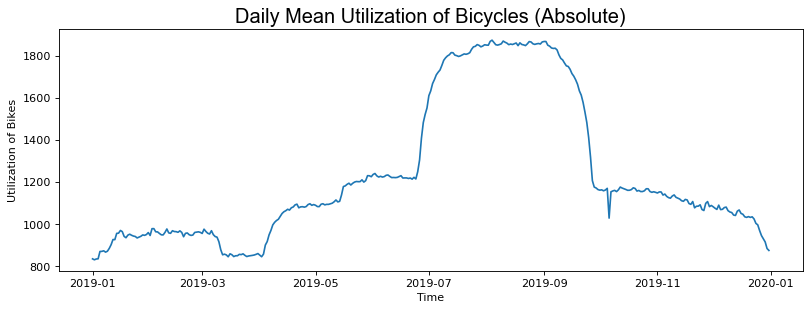

In [25]:
fig,ax = plt.subplots(figsize=(12,4), dpi= 80) 

ax.plot(trips_hourly_engineered["utilization_absolute"].resample("d").mean())
ax.set_title("Daily Mean Utilization of Bicycles (Absolute)", fontsize=18, fontname="Arial")
ax.set_xlabel("Time")
ax.set_ylabel("Utilization of Bikes")
plt.show()

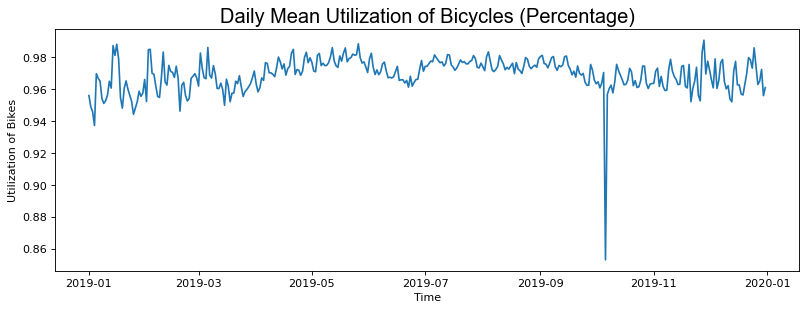

In [22]:
fig,ax = plt.subplots(figsize=(12,4), dpi= 80) 

ax.plot(trips_hourly_engineered["utilization_percentage"].resample("d").mean())
ax.set_title("Daily Mean Utilization of Bicycles (Percentage)", fontsize=18, fontname="Arial")
ax.set_xlabel("Time")
ax.set_ylabel("Utilization of Bikes")
plt.show()

### Revenue

### Coverage

In [2]:
#Calculate percentage of used bike stations